# STA365 Homework 2

### Question 1

**Likelihood (Binomial):**

$$
P(\mathbf{x} | \boldsymbol{\theta}, n) = \binom{n}{x} \theta^x (1 - \theta)^{n - x} \propto \theta^x (1 - \theta)^{n - x}
$$

**Prior (Discrete Uniform):**

$$
P(\theta) =
\begin{cases} 
\frac{1}{101} & \text{for } \theta = \frac{i}{100}, \, i = 0, 1, \dots, 100 \\[8pt]
0 & \text{otherwise}.
\end{cases}
$$

**Posterior:**

$$
P(\boldsymbol{\theta} | \mathbf{x}, n) \propto \theta^x (1 - \theta)^{n - x} \frac{1}{101} \propto \theta^x (1 - \theta)^{n - x}
$$

Therefore, the posterior follows a discrete distribution, which is proportional to the binomial likelihood function, evaluated over the discrete values of $\theta = \frac{i}{100}, \, i = 0, 1, \dots, 100$.

### Question 2

1.  $p(\boldsymbol{\theta_j}|x_j^{(t)},n_j^{(t)})$ is the posterior distribution of $\boldsymbol{\theta_j}$ under a model with Beta prior and Binomial likelihood (Beta-Binomial model).

2.

In [1]:
m = 10  # 10 time steps
n_j = [0]
x_j = [0]

# example of iterations

for t in range(m): #10 iterations
    print(f"Step {t}: n_j = {n_j[t]}, x_j = {x_j[t]}")
    
    n_j.append(n_j[t] + 1)
    x_j.append(x_j[t] + 1)


Step 0: n_j = 0, x_j = 0
Step 1: n_j = 1, x_j = 1
Step 2: n_j = 2, x_j = 2
Step 3: n_j = 3, x_j = 3
Step 4: n_j = 4, x_j = 4
Step 5: n_j = 5, x_j = 5
Step 6: n_j = 6, x_j = 6
Step 7: n_j = 7, x_j = 7
Step 8: n_j = 8, x_j = 8
Step 9: n_j = 9, x_j = 9


3. and 4.

In [15]:
import numpy as np
from scipy.stats import beta

# true theta/success probabilities
theta1_true = 0.6
theta2_true = 0.4

# initial values
n1 = [0]
x1 = [0]
n2 = [0]
x2 = [0]

m = 10

np.random.seed(365)

for t in range(m):
    # posterior samples for theta1, theta2
    posterior_theta1 = beta.rvs(a=x1[t] + 1, b=n1[t] - x1[t] + 1, size=10000)
    posterior_theta2 = beta.rvs(a=x2[t] + 1, b=n2[t] - x2[t] + 1, size=10000)

    # P(theta_1 < theta_2)
    p_theta1_lessthan_theta2 = np.mean(posterior_theta1 < posterior_theta2)

    # coin flip based on probabilities
    if np.random.rand() < p_theta1_lessthan_theta2:
        # use theta2_true
        outcome = np.random.rand() < theta2_true
        n2.append(n2[t] + 1)
        x2.append(x2[t] + (1 if outcome else 0))
        n1.append(n1[t])
        x1.append(x1[t])
    else:
        # use theta1_true
        outcome = np.random.rand() < theta1_true
        n1.append(n1[t] + 1)
        x1.append(x1[t] + (1 if outcome else 0))
        n2.append(n2[t])
        x2.append(x2[t])

        # algorithm's calculations of P(theta_1 < theta_2) over time
    print(f"Step {t}: P(theta_1 < theta_2) = {p_theta1_lessthan_theta2:.4f}")
    print(f"n1 = {n1[-1]}, x1 = {x1[-1]}, n2 = {n2[-1]}, x2 = {x2[-1]}")

Step 0: P(theta_1 < theta_2) = 0.4992
n1 = 0, x1 = 0, n2 = 1, x2 = 1
Step 1: P(theta_1 < theta_2) = 0.6668
n1 = 0, x1 = 0, n2 = 2, x2 = 1
Step 2: P(theta_1 < theta_2) = 0.5073
n1 = 0, x1 = 0, n2 = 3, x2 = 1
Step 3: P(theta_1 < theta_2) = 0.4034
n1 = 1, x1 = 0, n2 = 3, x2 = 1
Step 4: P(theta_1 < theta_2) = 0.5946
n1 = 2, x1 = 1, n2 = 3, x2 = 1
Step 5: P(theta_1 < theta_2) = 0.3727
n1 = 2, x1 = 1, n2 = 4, x2 = 1
Step 6: P(theta_1 < theta_2) = 0.2818
n1 = 3, x1 = 2, n2 = 4, x2 = 1
Step 7: P(theta_1 < theta_2) = 0.1700
n1 = 3, x1 = 2, n2 = 5, x2 = 1
Step 8: P(theta_1 < theta_2) = 0.1233
n1 = 3, x1 = 2, n2 = 6, x2 = 2
Step 9: P(theta_1 < theta_2) = 0.1977
n1 = 4, x1 = 3, n2 = 6, x2 = 2


5. After 10 iterations, the algorithm calculates $P(\boldsymbol{\theta_1}^{true} < \boldsymbol{\theta_2}^{true})=0.1977$, so it believes that $\boldsymbol{\theta_2}^{true}$ is smaller than $\boldsymbol{\theta_1}^{true}$.

Visualization of the algorithm's learning process over the 10 iterations:

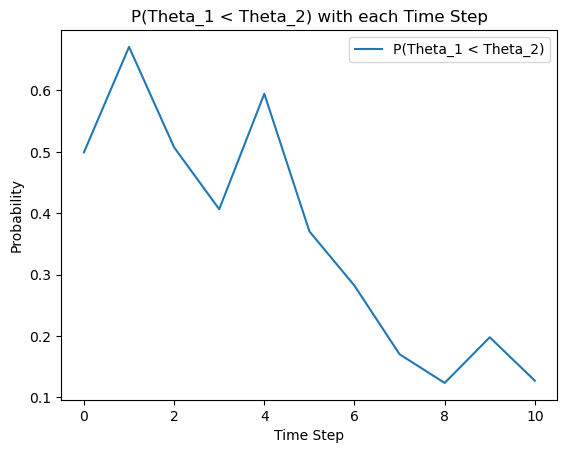

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(365)

pr_values = []
for t in range(len(n1)):
    posterior_theta1 = beta.rvs(a=x1[t] + 1, b=n1[t] - x1[t] + 1, size=10000)
    posterior_theta2 = beta.rvs(a=x2[t] + 1, b=n2[t] - x2[t] + 1, size=10000)
    pr_values.append(np.mean(posterior_theta1 < posterior_theta2))

plt.plot(range(len(pr_values)), pr_values, label="P(Theta_1 < Theta_2)")
plt.xlabel("Time Step")
plt.ylabel("Probability")
plt.title("P(Theta_1 < Theta_2) with each Time Step")
plt.legend()
plt.show()

### Question 3

##### Analysis 1:

In [29]:
from scipy.stats import beta
from scipy.stats import binom
import numpy as np

alphas = [1, 1, 1]
betas = [1, 1, 1]

np.random.seed(365)

# simulated data
n_trials = [1000, 1000, 1000]
theta123_true_probabilities = [0.6, 0.4, 0.25]  # true success probs
x = [binom.rvs(n_trials[i], theta123_true_probabilities[i]) for i in range(3)]  # simulated results

# Update posterior parameters
posterior_alpha = [alphas[i] + x[i] for i in range(3)]
posterior_beta = [betas[i] + n_trials[i] - x[i] for i in range(3)]

# posterior results, new beliefs
for j in range(3):
    print(f"Theta_{j+1}: Beta({posterior_alpha[j]}, {posterior_beta[j]})")

Theta_1: Beta(636, 366)
Theta_2: Beta(414, 588)
Theta_3: Beta(263, 739)


##### Analysis 2:

In [30]:
from scipy.stats import dirichlet
from scipy.stats import multinomial
import numpy as np

alphas_dirichlet = [1, 1, 1]

np.random.seed(365)

# simulated data
thetas_dirichlet = dirichlet.rvs(alphas_dirichlet, size=1)[0]
n_total = sum(n_trials)
x_multinomial = multinomial.rvs(n=n_total, p=thetas_dirichlet)  # simulated results

# Update parameters
updated_alpha_dirichlet = [alphas_dirichlet[i] + x_multinomial[i] for i in range(3)]

# posterior results
print(f"Updated Dirichlet: {updated_alpha_dirichlet}")

Updated Dirichlet: [1683, 612, 708]


When we know that the parameters of interest are independent, I think the Beta-Binomial model is better than the Dirichlet-Multinomial, as it is simpler to use.

When a dependence exists or if we are unsure whether a dependence exists, I think Dirichlet-Multinomial is the better to model to use, as this model captures dependency between the arms.

A real-world context where the Bayesian multi-armed bandit could be deployed is in the context of online ad marketing. If you have a website and can display three different ads to visitors, you can at first display each of the three ads the same amount of times (exploration). As you gather data and the model keeps updating, you will eventually see the proportion of times each ad is clicked on. The Bayesian multi-armed bandit method would then start showing ads with a higher proportion of times clicked more often, to try and maximize the number of ads clicked (exploitation).